### FordGoBike Project for 2018 data

  * We will try to answer these questions and lastly, we will be comparing performance between year 2017 and 2018.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import calendar
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap, figure
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
import matplotlib.ticker as tick
from math import radians, sin, cos, acos
import math
%matplotlib inline

In [2]:
df = pd.read_csv('df_2018.csv')

In [3]:
df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 17 columns):
Unnamed: 0                 int64
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(3), object(7)
memory usage: 241.7+ MB


  * duration_sec needs to be in minutes
  * start_time and end_time needs to be in time format
  * find the distance between end_station_latitude and end_station_longitude
  * find age of member
  

In [5]:
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])

In [6]:
df['start_time_date']=df['start_time'].dt.date
df['end_time_date']=df['end_time'].dt.date

In [7]:
df['start_time_year_month']=df['start_time'].map(lambda x: x.strftime('%Y-%m'))
df['end_time_year_month']=df['end_time'].map(lambda x: x.strftime('%Y-%m'))


In [8]:
df['start_time_year']=df['start_time'].dt.year.astype(int)
df['end_time_year']=df['end_time'].dt.year.astype(int)


In [9]:
df['start_time_month']=df['start_time'].dt.month.astype(int)
df['end_time_month']=df['end_time'].dt.month.astype(int)


In [10]:
df['start_time_hour_minute']=df['start_time'].map(lambda x: x.strftime('%H-%m'))
df['end_time_hour_minute']=df['end_time'].map(lambda x: x.strftime('%H-%m'))


In [11]:

df['start_time_hour']=df['start_time'].dt.hour
df['end_time_hour']=df['end_time'].dt.hour


In [12]:
df['start_time_weekday']=df['start_time'].dt.weekday_name
df['end_time_weekday']=df['end_time'].dt.weekday_name

In [13]:
df['start_time_weekday_abbr']=df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
df['end_time_weekday_abbr']=df['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])


df['start_time_year_month_renamed'] = df['start_time'].dt.strftime('%y' + '-' + '%m')


In [14]:
df['start_time_year_month'].sample(5)

875333     2018-07
602951     2018-05
1560420    2018-10
1308590    2018-09
55843      2018-01
Name: start_time_year_month, dtype: object

In [15]:
df['duration_min'] = df['duration_sec']/60


In [16]:
df['duration_min'].sample(10)

1627595    13.833333
719806      7.183333
1138653    17.283333
506602      6.950000
511174     17.483333
1454546     4.050000
450233      5.966667
1555552    21.600000
193462     15.783333
1507100     5.416667
Name: duration_min, dtype: float64

In [17]:
### Calculations were derived from here using Haversine.py
### https://www.movable-type.co.uk/scripts/latlong.html

def distance(origin, destination):

    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [18]:

df['distance_km'] = df.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

df['distance_miles'] = df['distance_km']*0.621371


In [19]:
df.distance_miles.head(5)

0    1.548614
1    0.000000
2    1.848270
3    1.273630
4    1.516500
Name: distance_miles, dtype: float64

In [20]:
df.shape

(1863721, 36)

  * set up visuals with google map cyclist

In [21]:
len(df.member_birth_year )

1863721

In [22]:
df['member_age'] = 2019-df['member_birth_year']

In [23]:
df.member_age.count()

1753003

  * ISSUES
  * Age groups of people who took bike rides/ per age group
  * Number of daily bike rides
  * Get distance of bike rides
  * Duration of bike rides
  * Bike rides gender
  * Bike rides per weekdays
  * Bike rides per hourly rides
  * Count of rides from subscribers and customers
  * Average duration from sub and cust
  * monthly trends of bike rides per subscribers by age group
  * which docks are used most frequently top 10 stations
  * eBikes launched around April 24th
  * List paths that are most commonly used
  

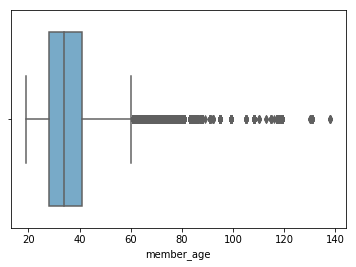

In [24]:
sb.boxplot(x='member_age', data=df, palette='Blues', orient='h')

  * There are outliers in the ages. We will discard these abnormal ages since we are more interested in bikers raing from 20 to 60. 

In [25]:
df=df[df['member_age'] <=60]

In [26]:
np.mean(df.member_age)

35.09173949948778

In [27]:
df.drop(['Unnamed: 0','member_birth_year'], axis=1, inplace=True)

In [28]:
p=figure(height=200)
p.diamond_cross(x=df.member_age , y=df.duration_sec)
show(p)


#### Finding daily number of bike rides 

In [29]:
def transform_axis_fmt(tick_val, pos):
    if tick_val >= 1000:
        val = int(tick_val/1000)
        return '{:d}K'.format(val)
    elif tick_val >= 1000000: 
        val = int(tick_val/1000000)
        return '{:d}M'.format(val)
    else:
        return int(tick_val)

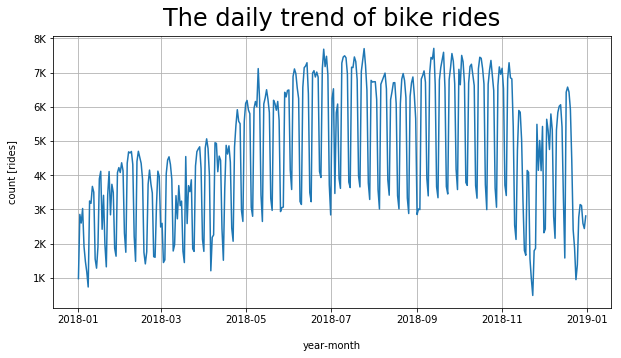

In [30]:
df.groupby('start_time_date').agg('count')['bike_id'].plot(kind = 'line', figsize = [10, 5])
plt.title('The daily trend of bike rides', fontsize=24, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.grid()
plt.savefig('pic15.png')


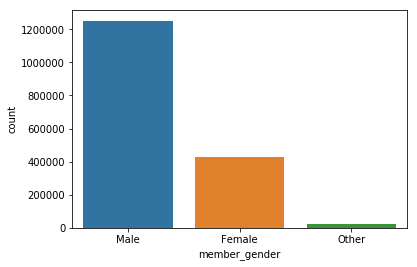

In [31]:
sb.countplot(data = df, x = 'member_gender')
plt.savefig('pic16.png')

  * There are significantly more males cyclists than females and other genders.


In [32]:
trip_by_weekday_df = df.groupby('start_time_weekday_abbr').agg({'bike_id':'count'})
trip_by_weekday_df['perc'] = (trip_by_weekday_df['bike_id']/trip_by_weekday_df['bike_id'].sum())*100


In [33]:
weekday_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

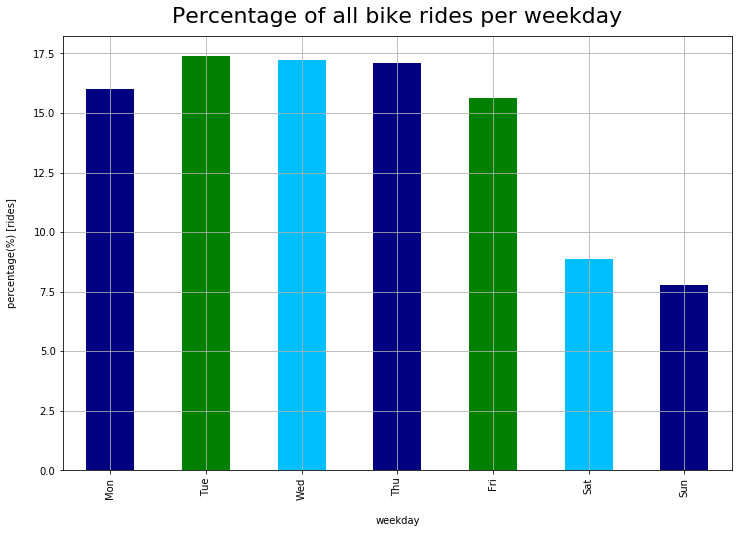

In [34]:
new_color = ['navy', 'green', 'deepskyblue', 'navy', 'green', 'deepskyblue', 'navy']
trip_by_weekday_df.reindex(weekday_index)['perc'].plot(kind='bar', color=new_color, figsize=(12,8), legend=False)
plt.title('Percentage of all bike rides per weekday', fontsize=22, y=1.015)
plt.xlabel('weekday', labelpad=16)
plt.ylabel('percentage(%) [rides]', labelpad=16)
plt.savefig('pic17.png')
plt.grid()


In [35]:
trip_by_weekday_df.describe()

,bike_id,perc
count,7.000000,7.000000
mean,244035.714286,14.285714
std,70722.623452,4.140063
min,132848.000000,7.776848
25%,209306.500000,12.252685
50%,273491.000000,16.010010
75%,293180.000000,17.162593
max,296938.000000,17.382585


  * It looks like the most popular days that cyclists ride their bikes is tuesday and wednesday with 16.9% rides.

#### Age Groups bikers per month

  * Creating age groups of cyclists.

In [36]:

df['member_age_bins'] = df['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '21 - 30' if 20<x<=30
                                                  else '31 - 40' if 30<x<=40
                                                  else '41 - 50' if 40<x<=50
                                                  else '51 - 60' if 50<x<=60
                                                  else x)


In [37]:
df.member_age_bins.head(5)

0    31 - 40
2    21 - 30
4    21 - 30
6    31 - 40
7    31 - 40
Name: member_age_bins, dtype: object

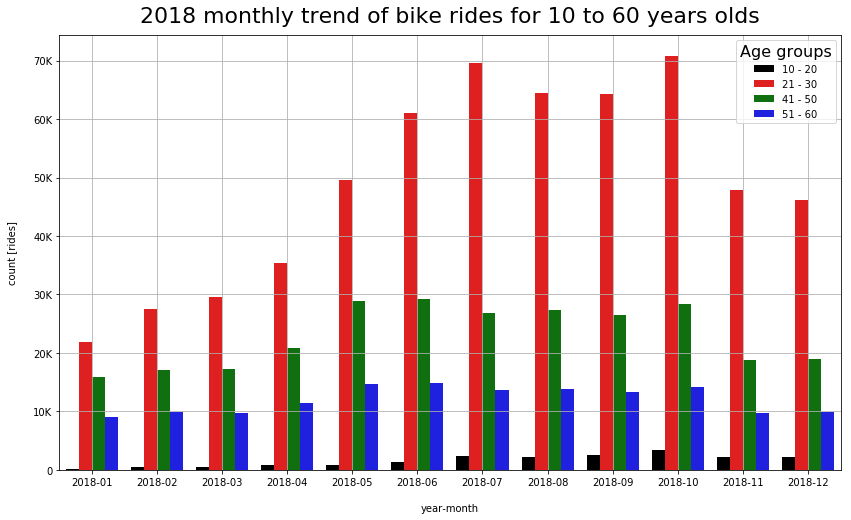

In [38]:
plt.figure(figsize=(14,8))
my_palette = {'10 - 20': 'black', '21 - 30': 'red', '31 - 40': 'blue', '41 - 50': 'green','51 - 60': 'blue'}
ax = sb.countplot(x='start_time_year_month', hue='member_age_bins', palette=my_palette,
                   data=df[df['member_age_bins'].isin(['10 - 20','21 - 30', '31 - 41', '41 - 50', '51 - 60'])].sort_values(by=['start_time_year_month', 'member_age_bins']))
plt.title('2018 monthly trend of bike rides for 10 to 60 years olds', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('Age groups',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.grid()
plt.savefig('pic18.png')



In [39]:

trip_by_hour = df.groupby('start_time_hour').agg({'bike_id':'count'}).reset_index()

In [40]:
trip_by_hour['bike_id'] = (trip_by_hour['bike_id']/trip_by_hour['bike_id'].sum())*100

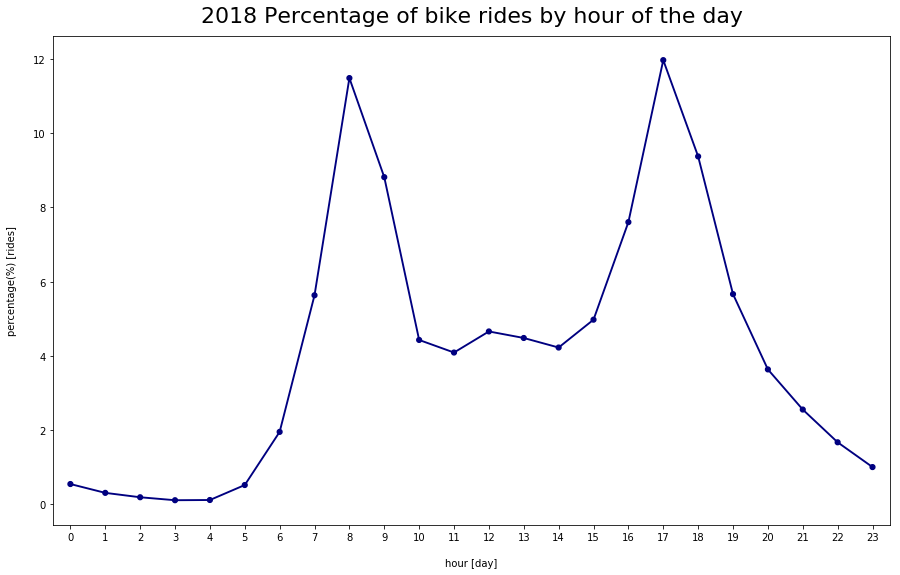

In [41]:
plt.figure(figsize=(15,9))
sb.pointplot(x='start_time_hour', y='bike_id', scale=.7, color='navy', data=trip_by_hour)
plt.title('2018 Percentage of bike rides by hour of the day', fontsize=22, y=1.015)
plt.xlabel('hour [day]', labelpad=16)
plt.ylabel('percentage(%) [rides]', labelpad=16)
plt.savefig('pic19.png')



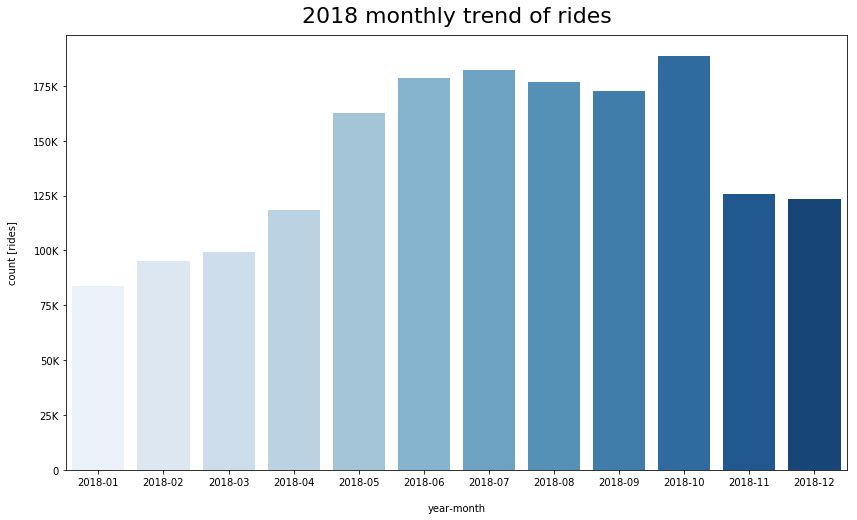

In [42]:
plt.figure(figsize=(14,8))
sb.countplot(x='start_time_year_month', palette="Blues", 
             data=df.sort_values(by='start_time_year_month'))
plt.title('2018 monthly trend of rides', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('pic20.png')

#### Percentage of all bike rides per group

In [43]:

trip_by_age_df = df.groupby('member_age_bins').agg({'bike_id':'count'})


In [44]:

trip_by_age_df['perc'] = (trip_by_age_df['bike_id']/trip_by_age_df['bike_id'].sum())*100


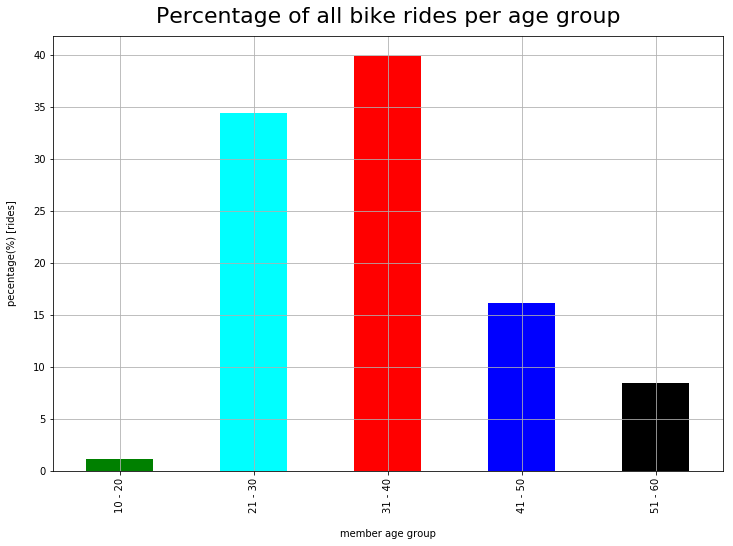

In [45]:

new_color = ['green','cyan', 'red', 'blue', 'black','green','magenta']
trip_by_age_df['perc'].plot(kind='bar', color=new_color, figsize=(12,8))
plt.title('Percentage of all bike rides per age group', fontsize=22, y=1.015)
plt.xlabel('member age group', labelpad=16)
plt.ylabel('pecentage(%) [rides]', labelpad=16)
plt.grid()
plt.savefig('pic21.png')


  * count of bike rides of subscribers and customers

In [46]:
count_of_rides_per_user_type = df.groupby('user_type').size().reset_index(name='count')


In [47]:
count_of_rides_per_user_type['count']/len(df)*100

0    11.672999
1    88.327001
Name: count, dtype: float64

In [48]:
user_type_count_per_year_df = df.groupby(["start_time_year_month", "user_type"]).size().reset_index()


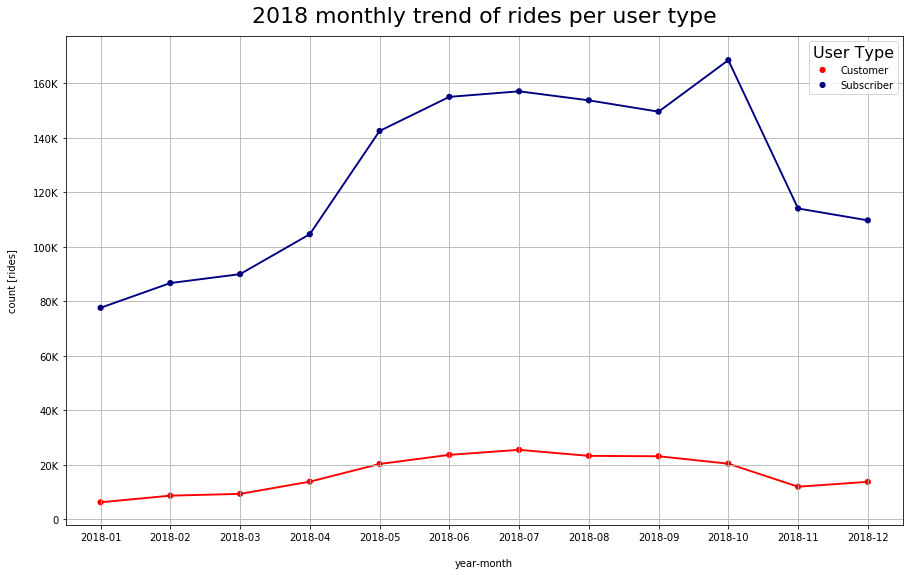

In [49]:

plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'navy', 'Customer':'red'}
ax = sb.pointplot(x='start_time_year_month', y=0, hue='user_type', palette=my_palette, scale=.7, 
                  data=user_type_count_per_year_df)
plt.title('2018 monthly trend of rides per user type', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.grid()
plt.savefig('pic22.png')


In [50]:
df.start_time_year_month.head(5)

0    2018-01
2    2018-01
4    2018-01
6    2018-01
7    2018-01
Name: start_time_year_month, dtype: object

  * It seems that the subscribers made more frequesnt trips than the customers

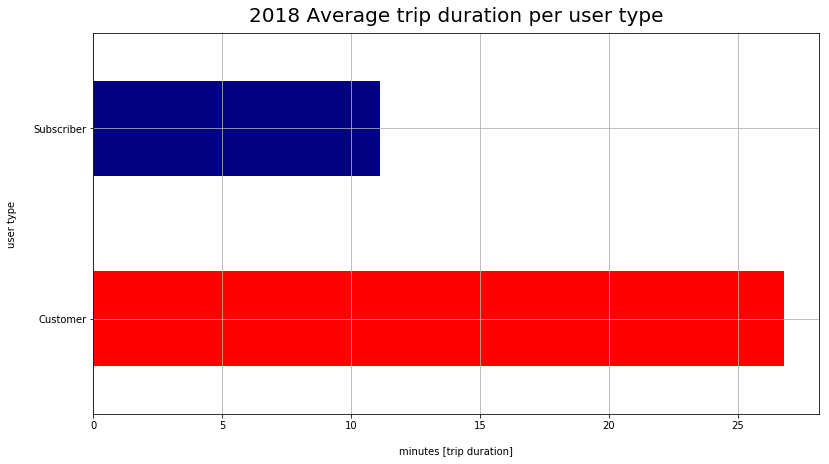

In [51]:
new_color=['red', 'navy']
ax = df.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('2018 Average trip duration per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('minutes [trip duration]', labelpad=16)
plt.grid()
plt.savefig('pic23.png')



  * Looking at the graph above, subscribers average trip was shorter but the frequency is greater than the customers when we look at the previous graph above.

In [52]:
subscriber_age_df = df[df['user_type']=='Subscriber'].groupby(['start_time_year_month', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()


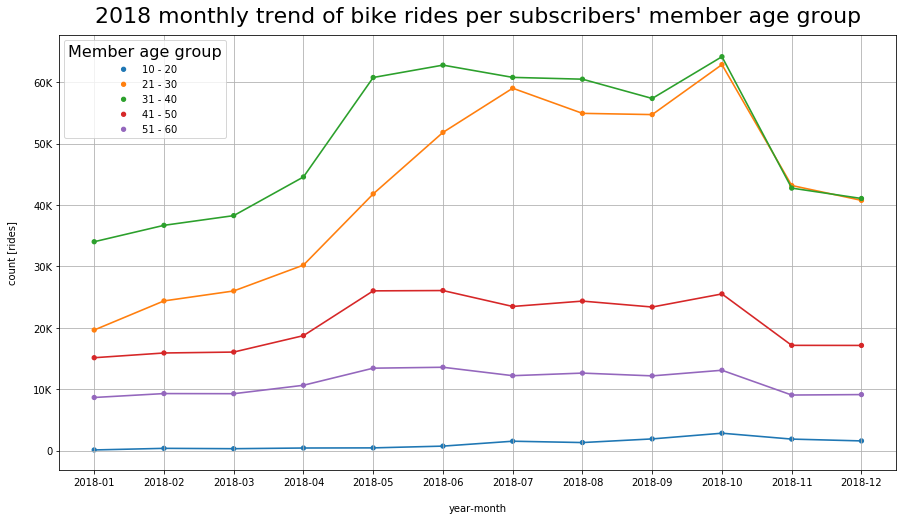

In [53]:
plt.figure(figsize=(15,8))
ax = sb.pointplot(x='start_time_year_month', y='bike_id', hue='member_age_bins', 
                  scale=.6, data=subscriber_age_df)
plt.title("2018 monthly trend of bike rides per subscribers' member age group", fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.grid()
plt.savefig('pic24.png')


In [54]:
customer_age_df = df[df['user_type']=='Customer'].groupby(['start_time_year_month', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()


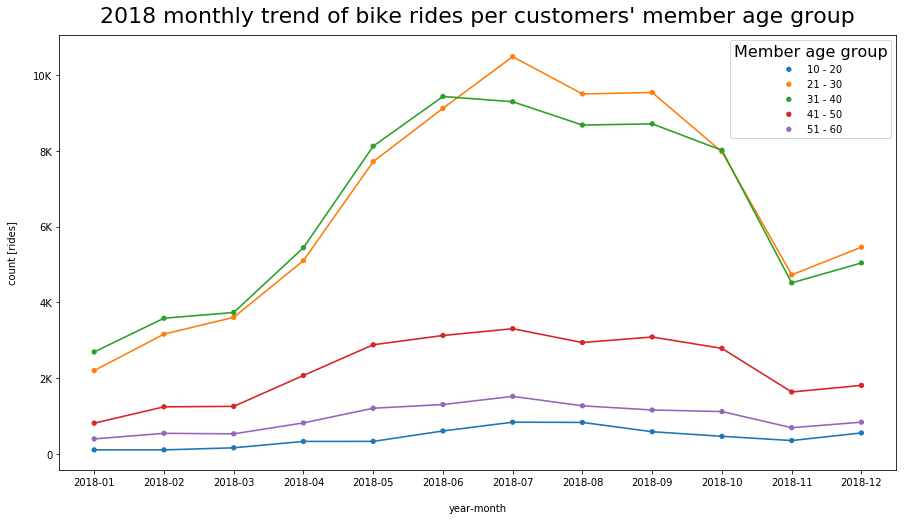

In [55]:
plt.figure(figsize=(15,8))
ax = sb.pointplot(x='start_time_year_month', y='bike_id', hue='member_age_bins', 
                  scale=.6, data=customer_age_df)
plt.title("2018 monthly trend of bike rides per customers' member age group", fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.savefig('pic25.png')

In [56]:
df.distance_miles.describe()

count    1.708250e+06
mean     9.921793e-01
std      6.354468e-01
min      0.000000e+00
25%      5.456830e-01
50%      8.558427e-01
75%      1.297049e+00
max      4.058128e+01
Name: distance_miles, dtype: float64

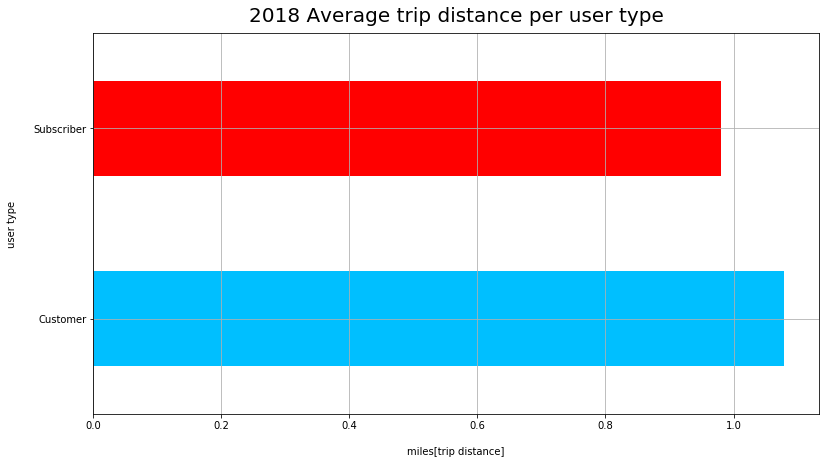

In [57]:
new_color=['deepskyblue', 'red']
ax = df.groupby('user_type')['distance_miles'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('2018 Average trip distance per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('miles[trip distance]', labelpad=16)
plt.grid()
plt.savefig('pic26.png')


In [58]:
df.groupby('user_type')['distance_miles'].mean()

user_type
Customer      1.079129
Subscriber    0.980688
Name: distance_miles, dtype: float64

In [59]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,end_time_hour,start_time_weekday,end_time_weekday,start_time_weekday_abbr,end_time_weekday_abbr,duration_min,distance_km,distance_miles,member_age,member_age_bins
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,19,Wednesday,Thursday,Wed,Thu,1254.733333,2.492254,1.548614,33.0,31 - 40
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,10,Wednesday,Thursday,Wed,Thu,1192.933333,2.974502,1.848270,23.0,21 - 30
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,6,Wednesday,Thursday,Wed,Thu,666.100000,2.440571,1.516500,28.0,21 - 30
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,...,0,Wednesday,Thursday,Wed,Thu,7.550000,1.341918,0.833829,31.0,31 - 40
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,...,23,Wednesday,Wednesday,Wed,Wed,3.000000,0.632718,0.393153,39.0,31 - 40


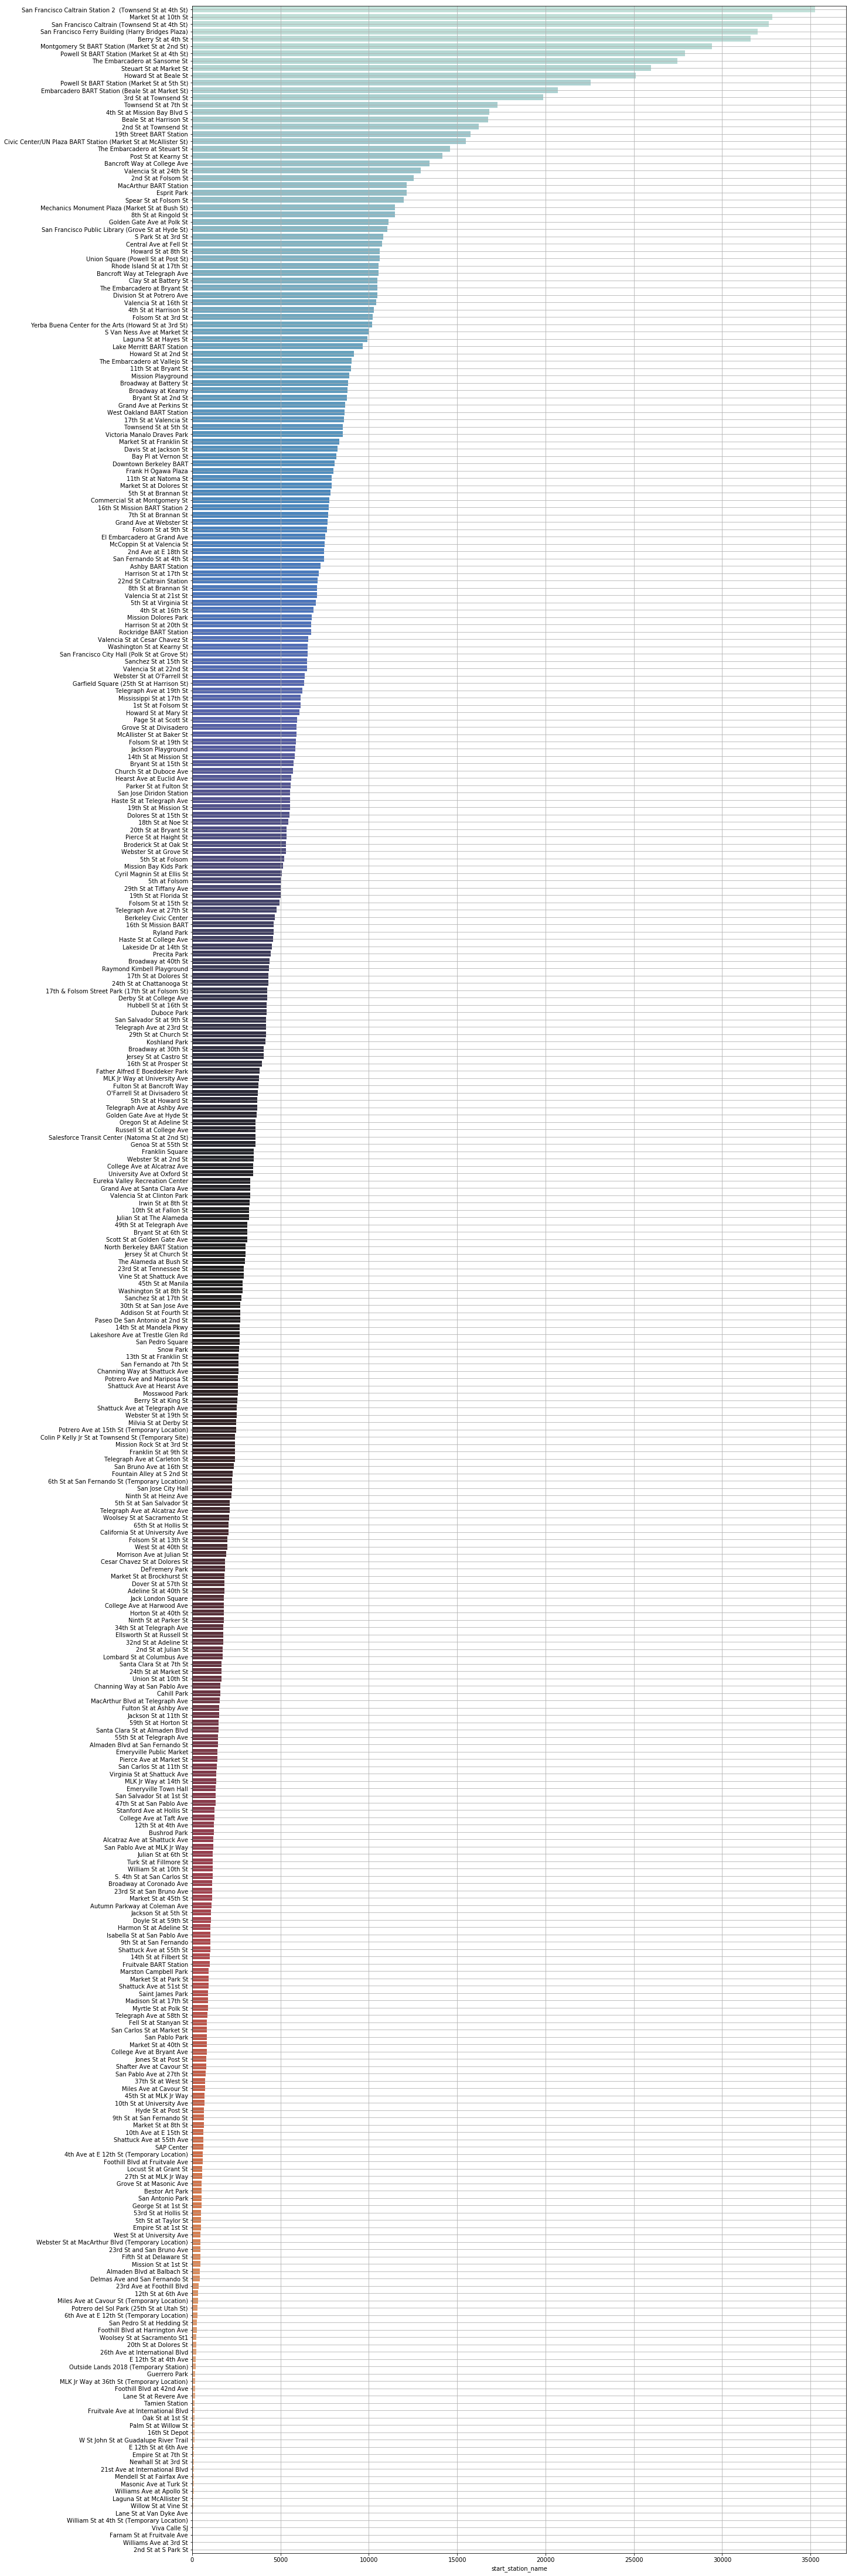

In [60]:
plt.figure(figsize=(20,80))
data=df.start_station_name.value_counts()
sb.barplot(y=data.index, x = data, orient='h',palette='icefire')
plt.grid()
plt.savefig('pic27.png')

In [61]:

top_50_popular_station = df.groupby(['start_station_name']).size().sort_values(ascending=False)[:50].to_frame().reset_index().start_station_name




In [59]:
print (top_50_popular_station)

0     San Francisco Ferry Building (Harry Bridges Pl...
1                         The Embarcadero at Sansome St
2        San Francisco Caltrain (Townsend St at 4th St)
3     San Francisco Caltrain Station 2  (Townsend St...
4                                  Market St at 10th St
5      Montgomery St BART Station (Market St at 2nd St)
6                                    Berry St at 4th St
7          Powell St BART Station (Market St at 4th St)
8                                 Howard St at Beale St
9                               Steuart St at Market St
10         Powell St BART Station (Market St at 5th St)
11     Embarcadero BART Station (Beale St at Market St)
12                  2nd St at Townsend St - Coming Soon
13                                3rd St at Townsend St
14                                Townsend St at 7th St
15                        The Embarcadero at Steuart St
16                                  2nd St at S Park St
17                                  Howard St at